# Sales Data Analys

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [30]:
sales = pd.read_csv('Downloads/sales_data.csv', parse_dates = ['date'])

In [36]:
sales.shape

(1000, 8)

In [32]:
sales.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


In [33]:
sales.describe()

,quantity,unit_price,total
count,1000.000000,1000.000000,1000.000000
mean,9.395000,30.322040,289.113000
std,9.659207,12.256488,345.227596
min,1.000000,10.030000,10.350000
25%,4.000000,21.085000,93.687500
50%,6.500000,28.570000,178.360000
75%,10.000000,37.917500,321.690000
max,40.000000,66.620000,2546.330000


In [37]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1000 non-null   datetime64[ns]
 1   warehouse     1000 non-null   object        
 2   client_type   1000 non-null   object        
 3   product_line  1000 non-null   object        
 4   quantity      1000 non-null   int64         
 5   unit_price    1000 non-null   float64       
 6   total         1000 non-null   float64       
 7   payment       1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.6+ KB


In [41]:
sales['product_line'].value_counts()

Breaking system          230
Suspension & traction    228
Electrical system        193
Frame & body             166
Miscellaneous            122
Engine                    61
Name: product_line, dtype: int64

<AxesSubplot:ylabel='product_line'>

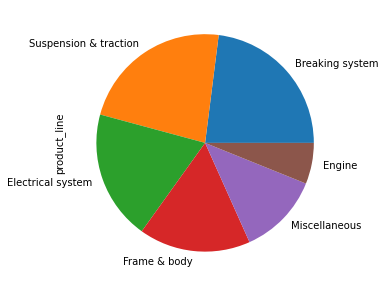

In [45]:
sales['product_line'].value_counts().plot(kind='pie', figsize= (12,5))

<AxesSubplot:>

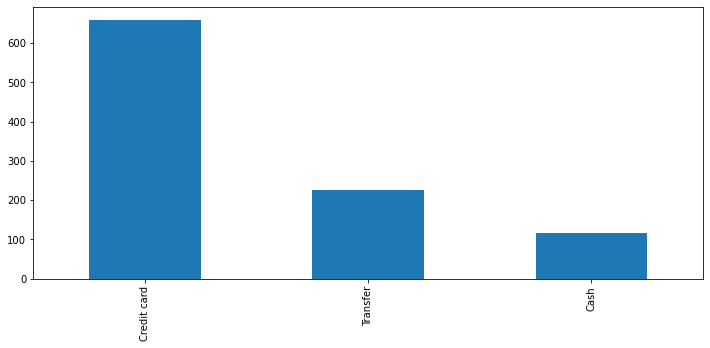

In [57]:
sales['payment'].value_counts().plot(kind='bar', figsize= (12,5))

<AxesSubplot:>

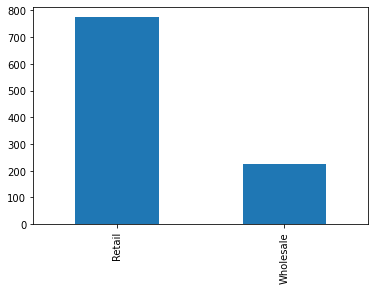

In [58]:
sales['client_type'].value_counts().plot(kind = 'bar')

In [50]:
corelation = sales.corr()
corelation

,quantity,unit_price,total
quantity,1.000000,0.035822,0.870207
unit_price,0.035822,1.000000,0.372942
total,0.870207,0.372942,1.000000


([<matplotlib.axis.YTick at 0x1c52cd125e0>,
 [Text(0, 0, 'quantity'), Text(0, 1, 'unit_price'), Text(0, 2, 'total')])

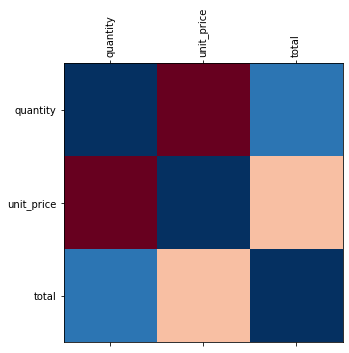

In [55]:
fig = plt.figure(figsize=(5,5))
plt.matshow(corelation, cmap= 'RdBu', fignum= fig.number)
plt.xticks(range(len(corelation.columns)), corelation.columns, rotation='vertical')
plt.yticks(range(len(corelation.columns)), corelation.columns)